importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


loading dataset and splitting it

In [ ]:
dataset=pd.read_csv('advertising_sales_data.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

HANDLING MISSING VALUES

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer.fit(x[:,1:4])
x[:,1:4]=imputer.transform(x[:,1:4])


encoding the independent variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(ct.fit_transform(x).toarray())


splitting in training and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

trainig the model


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

predicting the test set

In [ ]:
y_pred = regressor.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"\n4. R² score on test set: {r2:.4f}")



4. R² score on test set: 0.8747


visualising the test set results

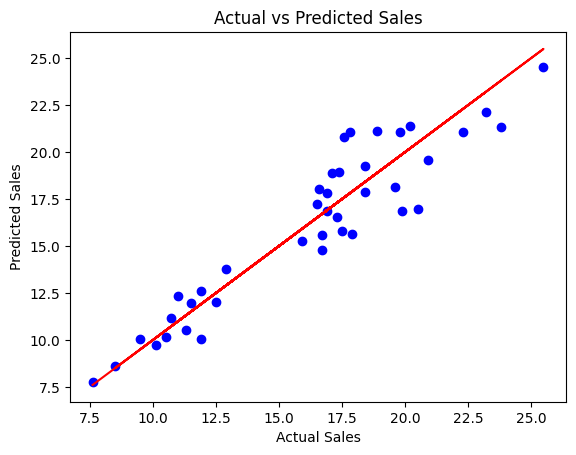

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')       # Plot actual vs predicted points
plt.plot(y_test, y_test, color='red')           # Line of perfect prediction
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


average amount spent on TV advertising in the dataset

In [ ]:
  avg_tv = dataset['TV'].mean()
  print("Average amount spent on TV advertising:", avg_tv)


Average amount spent on TV advertising: 147.0425


the correlation between radio advertising expenditure and product sales

In [ ]:
corr_radio_sales = dataset['Radio'].corr(dataset['Sales'])
print("Correlation between Radio Advertising Expenditure and Product Sales:", corr_radio_sales)


Correlation between Radio Advertising Expenditure and Product Sales: 0.3497277129207837


advertising medium has the highest impact on sales based on the dataset

In [ ]:

# Step 1: List of ad channels
ad_channels = ['TV', 'Radio', 'Newspaper']

# Step 2: Calculate correlation of each with Sales

correlations = {}

for channel in ad_channels:
    corr = dataset[channel].corr(dataset['Sales'])
    correlations[channel] = corr
    print(f"- {channel}: {corr:.2f}")

# Step 3: Find the channel with the highest correlation
most_impactful = max(correlations, key=correlations.get)
print(f"\n✅ The advertising medium with the highest impact on Sales is: **{most_impactful}**")


- TV: 0.90
- Radio: 0.35
- Newspaper: 0.16

✅ The advertising medium with the highest impact on Sales is: **TV**


sales predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper

In [ ]:
new_input = [["camp1", 200, 40, 50]]
new_encoded = ct.transform(new_input).toarray()
new_prediction = regressor.predict(new_encoded)[0]
print(f"Predicted Sales: {new_prediction:.2f} units")


Predicted Sales: 20.69 units


 performance of the linear regression model change when the dataset is normalized

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors

In [ ]:
X_rn =  dataset[['Radio', 'Newspaper']].values
y_rn =  dataset['Sales'].values

# Impute if needed
X_rn = SimpleImputer(strategy='mean').fit_transform(X_rn)

# Train/test split
X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_rn, y_rn, test_size=0.2, random_state=1)

model_rn = LinearRegression()
model_rn.fit(X_train_rn, y_train_rn)
y_pred_rn = model_rn.predict(X_test_rn)
r2_rn = r2_score(y_test_rn, y_pred_rn)

print(f"\n7. R² score using only Radio & Newspaper: {r2_rn:.4f}")
print(f"(Compare with full model R²: {r2:.4f})")


7. R² score using only Radio & Newspaper: 0.0078
(Compare with full model R²: 0.8747)
